Forecast the CocaCola prices data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [73]:
# load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

### Load the data file

In [74]:
coca= pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
coca

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


### Look at the top 5 record of data

In [75]:
coca.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


# EDA

Check the various attributes of data like shape(rows and cols),columns,datatypes

In [76]:
coca.shape

(42, 2)

In [77]:
coca.columns.values

array(['Quarter', 'Sales'], dtype=object)

In [78]:
# checking the data types of all the columns
coca.dtypes

Quarter     object
Sales      float64
dtype: object

In [79]:
# check the descriptive statistics of numeric varaiable
coca.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


We can clearly seen that what are the min, median, std, max and 25%, 50%, 75% values.

In [80]:
coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


No Null values. Note data type of data columns

# Duplicates

In [81]:
#Count of duplicated rows
coca[coca.duplicated()].shape

(0, 2)

There is a no duplicate rows in the dataset.

<AxesSubplot:>

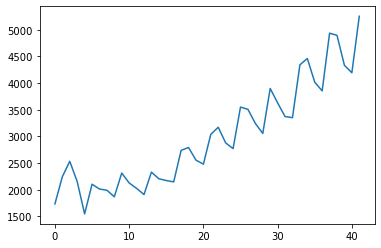

In [82]:
#line plot
coca.Sales.plot()

There seen to be a quadratic upward tend with additive seasonality.

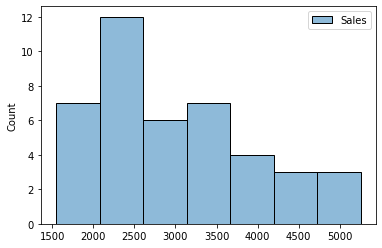

In [83]:
sns.histplot(data=coca)
plt.show()

sales count with reference to quarter

In [84]:
#Seperating and Aggregating the Quarters and years present in the 'Quarter' column of the original data, in order to do one hot encoding.
coca['quarters']=0
coca['Year']=0
for i in range(42):
    p=coca['Quarter'][i]
    coca['quarters'][i]=p[0:2]
    coca['Year'][i]=p[3:5]    
coca.head()

,Quarter,Sales,quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [85]:
#dummy variables that are created for the Quarter column with the original dataset
quater_dumies=pd.DataFrame(pd.get_dummies(coca['quarters']))
quater_dumies.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [86]:
cocac=pd.concat([coca,quater_dumies],axis=1)

In [87]:
cocac

,Quarter,Sales,quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0
5,Q2_87,2104.411995,Q2,87,0,1,0,0
6,Q3_87,2014.362999,Q3,87,0,0,1,0
7,Q4_87,1991.746998,Q4,87,0,0,0,1
8,Q1_88,1869.049999,Q1,88,1,0,0,0
9,Q2_88,2313.631996,Q2,88,0,1,0,0


In [88]:
cocac['time']=range(1,43)
cocac['time_sqr']=cocac['time']*cocac['time']
cocac['log_sales']=np.log(cocac['Sales'])

In [89]:
cocac

,Quarter,Sales,quarters,Year,Q1,Q2,Q3,Q4,time,time_sqr,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,87,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,87,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,87,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,88,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,88,0,1,0,0,10,100,7.746574


Text(0.5, 1.0, 'Heatmap of Sales Count with Year and Quarters')

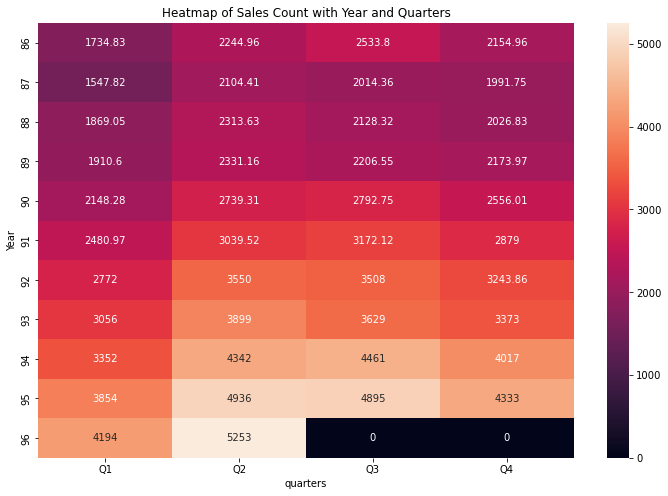

In [94]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=cocac,values="Sales",index="Year",columns="quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")
plt.title('Heatmap of Sales Count with Year and Quarters')

<AxesSubplot:xlabel='Year', ylabel='Sales'>

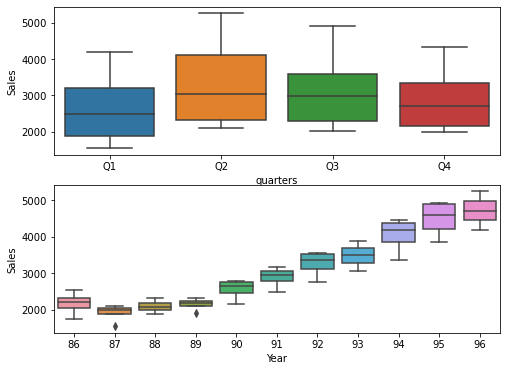

In [98]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="quarters",y="Sales",data=cocac)
plt.subplot(212)
sns.boxplot(x="Year",y="Sales",data=cocac)

box plot to understand the sales of all the four quarters.
the sales of coca cola throughout the years with 4 components - Trend, Cyclic,Seasonality and Irregularity component.

<AxesSubplot:xlabel='Year', ylabel='Sales'>

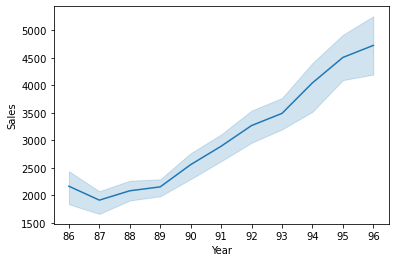

In [99]:
sns.lineplot(x='Year',y='Sales',data=cocac)

understand the past sales growth and to forecast the predictions

# Splitting data

In [100]:
Train = cocac.head(31)
Test = cocac.tail(10)

<AxesSubplot:xlabel='Sales', ylabel='Density'>

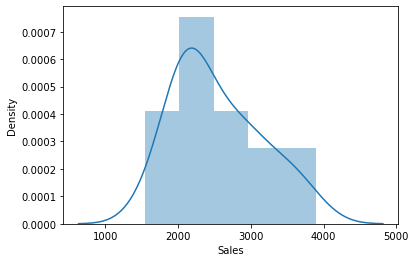

In [101]:
import seaborn as sns
sns.distplot(Train.Sales)

In [102]:
np.log(Train.Sales)

0     7.458663
1     7.716443
2     7.837477
3     7.675529
4     7.344602
5     7.651791
6     7.608058
7     7.596767
8     7.533186
9     7.746574
10    7.663088
11    7.614228
12    7.555175
13    7.754123
14    7.699185
15    7.684309
16    7.672422
17    7.915461
18    7.934783
19    7.846203
20    7.816407
21    8.019456
22    8.062154
23    7.965199
24    7.927324
25    8.174703
26    8.162801
27    8.084519
28    8.024862
29    8.268475
30    8.196712
Name: Sales, dtype: float64

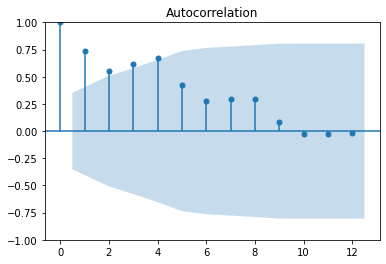

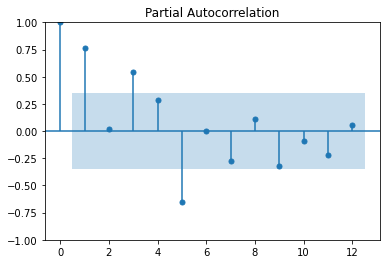

In [103]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Train.Sales,lags=12)
tsa_plots.plot_pacf(Train.Sales,lags=12)
plt.show()
#Autocorrelation Factor >> uptill 6 we have good corr() above +-2 SE [Standard Error]
#Partial Autocorrelation Factor >> only 9 and 11 show some good corr() +-2 SE [Standard Error]

# Apply Forecasting Methods

In [104]:
cocac

,Quarter,Sales,quarters,Year,Q1,Q2,Q3,Q4,time,time_sqr,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,87,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,87,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,87,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,88,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,88,0,1,0,0,10,100,7.746574


In [105]:
#performance metrics 
pfm_model_bsd = dict() # For model driven
pfm_data_bsd = dict() # For Data driven

In [107]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~time',data=cocac).fit()
#pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['Month'])))
#rmse_linear = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_linear))**2))
#rmse_linear
linear_model.predict(cocac.time)

0     1492.151553
1     1565.429688
2     1638.707822
3     1711.985956
4     1785.264091
5     1858.542225
6     1931.820359
7     2005.098494
8     2078.376628
9     2151.654763
10    2224.932897
11    2298.211031
12    2371.489166
13    2444.767300
14    2518.045434
15    2591.323569
16    2664.601703
17    2737.879837
18    2811.157972
19    2884.436106
20    2957.714241
21    3030.992375
22    3104.270509
23    3177.548644
24    3250.826778
25    3324.104912
26    3397.383047
27    3470.661181
28    3543.939315
29    3617.217450
30    3690.495584
31    3763.773719
32    3837.051853
33    3910.329987
34    3983.608122
35    4056.886256
36    4130.164390
37    4203.442525
38    4276.720659
39    4349.998793
40    4423.276928
41    4496.555062
dtype: float64

In [108]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~time',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['time'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
pfm_model_bsd.update( {'Linear Model' : rmse_linear} )
rmse_linear

742.4653093049552

In [112]:
#Exponential

Exp = smf.ols('log_sales~time',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['time'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
pfm_model_bsd.update( {'Exponential Model' : rmse_Exp} )
rmse_Exp

572.3734372809157

In [113]:
#Quadratic 

Quad = smf.ols('Sales~time+time_sqr',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["time","time_sqr"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
pfm_model_bsd.update( {'Quadratic Model' : rmse_Quad} )
rmse_Quad

603.119283630983

In [115]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
pfm_model_bsd.update( {'Additive seasonality' : rmse_add_sea} )
rmse_add_sea

1871.7435386758377

In [116]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~time+time_sqr+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','time','time_sqr']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
pfm_model_bsd.update( {'Additive Seasonality Quadratic' : rmse_add_sea_quad} )
rmse_add_sea_quad

436.0876274370016

In [117]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
pfm_model_bsd.update( {'Multiplicative Seasonality' : rmse_Mult_sea} )
rmse_Mult_sea

1927.1326220319675

In [118]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_sales~time+time_sqr+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
pfm_model_bsd.update( {'Multiplicative Additive Seasonality ' : rmse_Mult_add_sea} )
rmse_Mult_add_sea 

1186.0436524939503

In [119]:
result_model_bsd = pd.DataFrame(pfm_model_bsd.items(),columns=['MODEL', 'RMSE'])
result_model_bsd.sort_values(by=['RMSE'])
#Additive Seasonality Quadratic has the best values
# We will plot the forcasting in the evaluation part

,MODEL,RMSE
4,Additive Seasonality Quadratic,436.087627
1,Exponential Model,572.373437
2,Quadratic Model,603.119284
0,Linear Model,742.465309
6,Multiplicative Additive Seasonality,1186.043652
3,Additive seasonality,1871.743539
5,Multiplicative Seasonality,1927.132622


Model Evaluation - Additive Seasonality Quadratic

In [120]:
#Build the model on entire data set
model_full = smf.ols('log_sales~time+time_sqr+Q1+Q2+Q3+Q4',data=cocac).fit()

In [121]:
pred_new  = pd.Series(model_full.predict(cocac))
pred_new

0     7.429241
1     7.655915
2     7.644034
3     7.551496
4     7.474669
5     7.704113
6     7.695001
7     7.605233
8     7.531176
9     7.763390
10    7.757048
11    7.670049
12    7.598762
13    7.833745
14    7.830173
15    7.745945
16    7.677427
17    7.915180
18    7.914378
19    7.832919
20    7.767171
21    8.007694
22    8.009661
23    7.930972
24    7.867994
25    8.111287
26    8.116024
27    8.040105
28    7.979896
29    8.225959
30    8.233466
31    8.160316
32    8.102878
33    8.351710
34    8.361987
35    8.291607
36    8.236938
37    8.488540
38    8.501586
39    8.433976
40    8.382077
41    8.636449
dtype: float64

In [122]:
cocac["forecasted_sales"] = pd.Series(np.exp(pred_new))

In [123]:
cocac

,Quarter,Sales,quarters,Year,Q1,Q2,Q3,Q4,time,time_sqr,log_sales,forecasted_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663,1684.528757
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443,2113.108342
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477,2088.150211
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529,1903.588160
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602,1762.818162
5,Q2_87,2104.411995,Q2,87,0,1,0,0,6,36,7.651791,2217.449529
6,Q3_87,2014.362999,Q3,87,0,0,1,0,7,49,7.608058,2197.336692
7,Q4_87,1991.746998,Q4,87,0,0,0,1,8,64,7.596767,2008.680014
8,Q1_88,1869.049999,Q1,88,1,0,0,0,9,81,7.533186,1865.297774
9,Q2_88,2313.631996,Q2,88,0,1,0,0,10,100,7.746574,2352.866529


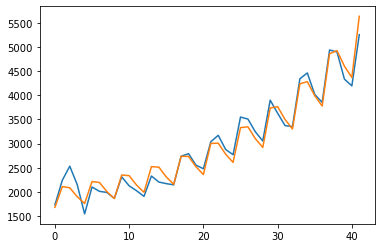

In [124]:
plt.plot(cocac[['Sales','forecasted_sales']].reset_index(drop=True))